ロジスティック回帰

問題１〜問題４まで順番に関数を作っていき、問題５の手前で雛形を完成させて実際のデータに入れて検証する

【問題1】仮定関数

In [4]:
# ロジスティック回帰の仮定関数をここで仮の実装を行う
# 特徴量ベクトル(i行j列)とパラメータ（重み）ベクトル（j列）を使用する


def sample_Logistic(X,param):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    param : 次の形のndarray, shape (n_features,1)
    
    Returns
    -------
    y :次の形のndarray, shape (n_samples, 1)
       線形の仮定関数による推定結果
    """
    
    import math
    # 式をわかりやすく、expの中身をlogiで定義しておく
    logi=-(X@param)
    y=1/(1+math.exp(logi))
    
    return y

【問題2】最急降下法

In [6]:
def _gradient_descent(X, y, X_val, y_val):
    """
    ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    """
    import math
    
    # バイアスがあるかないかの分岐、あるなら定数項の列を挿入
    if not (self.no_bias):    
        #　Xの定数項を作成
        X1=np.ones(len(X))
        #　定数項を接続
        X2=np.insert(X,0,X1,axis=1)
        X=X2
        
        #　X_valの定数項を作成
        X_val1=np.ones(len(X_val))
        #　定数項を接続
        X_val2=np.insert(X,0,X_val1,axis=1)
        X_val=X_val2    
        #　初期値　１で設定
        param=np.ones(X.shape[1])
    if self.no_bias:
        param=np.ones(X.shape[1])

    loss=[]
    param_pre=[]
    list_param=[]
    for i in range(self.num_iter) :
        # 正則化パラメータは仮で0.5とする
        seisoku=0.5
        logi=-(X@param)
        suitei_y=1/(1+math.exp(logi))
        a1=suitei_y-y
        a2=X.T@a1
        a3=a2+seisoku*param
        a4=a3/(len(X))
        a5=param-gakusyu*a4
        list_param.append(a5)
        param=a5
      
    for i in range(len(list_param)):
        son1=X@list_param[i]
        son2=sum((son1-y)**2)
        son3=son2/2*len(X)
        loss.append(son3)

    for i in range(len(list_param)):
        son1=X_val@list_param[i]
        son2=sum((son1-y_val)**2)
        son3=son2/2*len(X_val)
        val_loss.append(son3)
    
    
    self.loss= loss
    self.val_loss= val_loss
    
    if self.verbose:
        print(loss)
        print(val_loss)

    return param_pre,list_param,loss,val_loss
        

【問題3】推定

In [7]:
def predict_proba(self, X,param_pre):
    """
    ロジスティック回帰を使いラベルを推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    param_pre : パラメータの推定値ベクトル
    
    Returns
    -------
    y_pred:
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    
    y_pred=X@param_pre
    
    return y_pred

def predict(self, X,param_pre,shikii):
    """
    ロジスティック回帰を使い確率を推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    param_pre : パラメータの推定値ベクトル
    shikii: 0<=shikii<=1での閾値
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    
    y_pred=X@param_pre
    y_pred_list=[]
    for i in range(len(y_pred)):
        d=y_pred[i]
        if d<=shikii:
            y_pred_list.append(0)
        else:
            y_pred_list.append(1)
    
    
    return y_pred_list

【問題4】目的関数

【問題2】の中ですでに計算して出力するようにプログラムした

【問題5】学習と推定

実際のデータで検証するため、クラスの実装を雛形と今までやってきたものを中心にまず完成させる

In [308]:
import numpy as np
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    bias : bool
      バイアス項を入れる場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)                
        
    def fit(self,X, y, X_val, y_val):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        import math

        # バイアスがあるかないかの分岐、あるなら定数項の列を挿入
        if self.bias:    
            #　Xの定数項を作成
            X1=np.ones(len(X))
            #　定数項を接続
            X2=np.insert(X,0,X1,axis=1)
            X=X2

            #　X_valの定数項を作成
            X_val1=np.ones(len(X_val))
            #　定数項を接続
            X_val2=np.insert(X_val,0,X_val1,axis=1)
            X_val=X_val2    
            #　初期値　１で設定
            param=np.ones(X.shape[1])
            param=param.reshape(len(param),1)
        else:
            param=np.ones(X.shape[1])
            param=param.reshape(len(param),1)

        loss=[]
        val_loss=[]
        list_param=[]
        for i in range(self.iter) :
            # 正則化パラメータは仮で0.5とする
            seisoku=0.5
            logi=-(X@param)
            suitei_y=np.array(1)/(np.array(1)+np.exp(logi))
            suitei_y=suitei_y.reshape(len(suitei_y),1)
            a1=suitei_y-y
            a2=X.T@a1
            a22=(seisoku*param).reshape(len(seisoku*param),1)
            a3=a22+seisoku*param
            a4=a3/(len(X))
            param=param.reshape(len(param),1)
            a5=param-np.array(gakusyu)*a4
            list_param.append(a5)
            param_pre=a5
            param=param_pre

        for i in range(len(list_param)):
            son1=X@list_param[i]
            son2=sum((son1-y)**2)
            son3=son2/2*len(X)
            loss.append(son3)

        for i in range(len(list_param)):
            son1=X_val@list_param[i]
            son2=sum((son1-y_val)**2)
            son3=son2/2*len(X_val)
            val_loss.append(son3)


        self.loss= loss
        self.val_loss= val_loss

        if self.verbose:
            print(loss)
            print(val_loss)

        return param_pre,list_param,loss,val_loss
               
    def predict_proba(self, X,param_pre):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        param_pre : パラメータの推定値ベクトル

        Returns
        -------
        y_pred:
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        y_pred=X@param_pre

        return y_pred

    def predict(self, X,param_pre,shikii):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        param_pre : パラメータの推定値ベクトル
        shikii: 0<=shikii<=1での閾値
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        y_pred=X@param_pre
        y_pred_list=[]
        for i in range(len(y_pred)):
            d=y_pred[i]
            if d<=shikii:
                y_pred_list.append(0)
            else:
                y_pred_list.append(1)


        return y_pred_list

In [13]:
# アヤメのデータ取り込み

from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
data1=pd.DataFrame(iris.data,columns=iris.feature_names)
data2=pd.DataFrame(iris.target,columns=["Species"])



In [27]:
data1_1=data1[50:150]
data2_1=data2[50:150]

data1_1=np.array(data1_1)
data2_1=np.array(data2_1)

In [235]:
from sklearn.model_selection import train_test_split
train_xx=train_test_split(data1_1)
train_x=train_xx[0]
test_x=train_xx[1]

train_yy=train_test_split(data2_1)
train_y=train_yy[0]
test_y=train_yy[1]

In [309]:
slg=ScratchLogisticRegression(1000,0.9,False,False)
a,b,c,d=slg.fit(train_x,train_y,test_x,test_y)

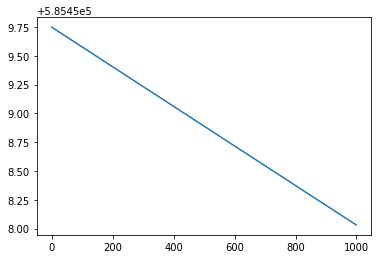

In [310]:
import matplotlib.pyplot as plt
plt.plot(c)